# Roseplot Vector Graphic
Dataset available here: https://understandinguncertainty.org/node/214

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Get data

In [11]:
raw_data = pd.read_csv('data/coxcomb.csv')
raw_data

,month,average size of army,zymotic diseases,wounds & injuries,all other causes
0,01/04/1854,8571,1,0,5
1,01/05/1854,23333,12,0,9
2,01/06/1854,28333,11,0,6
3,01/07/1854,28722,359,0,23
4,01/08/1854,30246,828,1,30
5,01/09/1854,30290,788,81,70
6,01/10/1854,30643,503,132,128
7,01/11/1854,29736,844,287,106
8,01/12/1854,32779,1725,114,131
9,01/01/1855,32393,2761,83,324


### Clean data

In [24]:
data = raw_data.iloc[9:21] # get records from 1855
data['month'] = pd.to_datetime(data['month'])
data['month'] = data['month'].dt.day 

/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
data.head()

,month,average size of army,zymotic diseases,wounds & injuries,all other causes
9,1,32393,2761,83,324
10,2,30919,2120,42,361
11,3,30107,1205,32,172
12,4,32252,477,48,57
13,5,35473,508,49,37


### Standard Rose

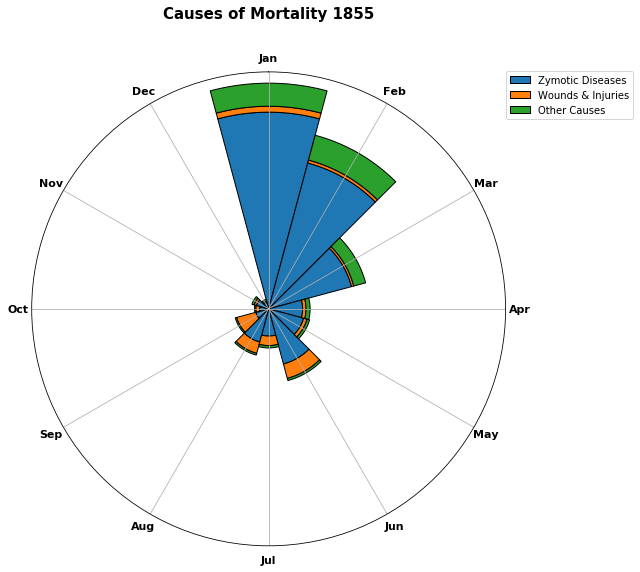

In [33]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111, projection='polar')

height_1 = np.array(data['zymotic diseases'])
height_2 = np.array(data['zymotic diseases']) + np.array(data['wounds & injuries'])
height_3 = np.array(data['zymotic diseases']) + np.array(data['wounds & injuries']) + np.array(data['all other causes'])

ax.bar(np.deg2rad(np.arange(0, 360, 30)), data['zymotic diseases'], 
       width=np.deg2rad(30), bottom=0, edgecolor='k')

ax.bar(np.deg2rad(np.arange(0, 360, 30)), data['wounds & injuries'], 
       width=np.deg2rad(30), bottom=height_1, edgecolor='k')

ax.bar(np.deg2rad(np.arange(0, 360, 30)), data['all other causes'], 
       width=np.deg2rad(30), bottom=height_2, edgecolor='k')


ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 30), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],size=11,weight= 'black')
#ax.set_rgrids(np.arange(0, height_3.max() , 20000), angle=0)
ax.set_rgrids([])
ax.legend(labels=['Zymotic Diseases','Wounds & Injuries','Other Causes'],loc=(1,0.9))
ax.set_title('Causes of Mortality 1855', y=1.10, fontsize=15,weight= 'black')

fig.tight_layout()
plt.savefig('figures/rosechart.png', bbox_inches='tight')

### Alternative style

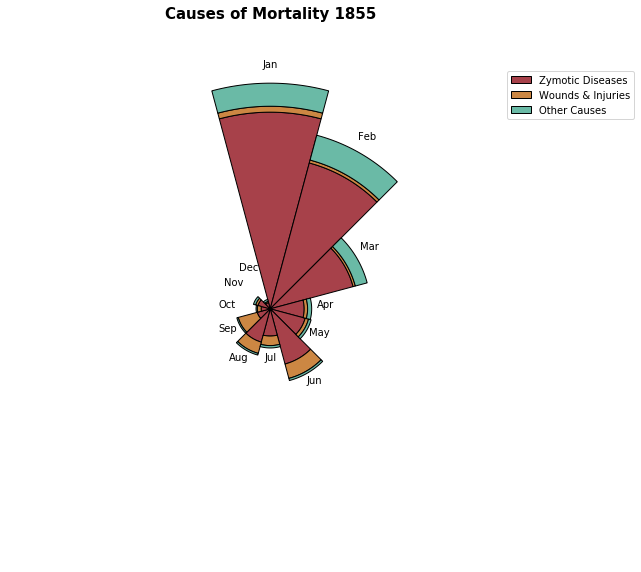

In [65]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(111, projection='polar')

height_1 = np.array(data['zymotic diseases'])
height_2 = np.array(data['zymotic diseases']) + np.array(data['wounds & injuries'])
height_3 = np.array(data['zymotic diseases']) + np.array(data['wounds & injuries']) + np.array(data['all other causes'])
radians = np.deg2rad(np.arange(0, 360, 30))

ax.bar(radians, data['zymotic diseases'], 
       width=np.deg2rad(30), color = '#A7414A',bottom=0, edgecolor='k')

ax.bar(radians, data['wounds & injuries'], 
       width=np.deg2rad(30),color = "#cc8743", bottom=height_1, edgecolor='k')

ax.bar(radians, data['all other causes'], 
       width=np.deg2rad(30),color='#6abaa6', bottom=height_2, edgecolor='k')
ax.grid(False)
plt.axis('off')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rgrids([])

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for radian, height, label in zip(radians,height_3, labels):
    if height <400: height = 400
    ax.text(radian, height+200, label,ha='center', va='bottom')

ax.legend(labels=['Zymotic Diseases','Wounds & Injuries','Other Causes'],loc=(1,0.9))
ax.set_title('Causes of Mortality 1855', y=1.10, fontsize=15,weight= 'black')

fig.tight_layout()
plt.savefig('figures/roseplot_adjusted.svg', bbox_inches='tight')